
Nama            : Dyah Ayu Kusuma Wardhani

Kelas           : PYTN KS 019

Kode Peserta    : PYTN-KS19-02

<h1 align="center"><font size="7"><strong>ASSIGMENT 3</strong></font></h1>

------------------------------------------------

Data ini merupakan data kampanye pemasaran langsung dari lembaga perbankan Portugis. Kampanye pemasaran didasarkan pada panggilan telepon. Seringkali, lebih dari satu kontak ke klien yang sama diperlukan, untuk mengakses apakah produk (deposito berjangka bank) akan ('ya') atau tidak ('tidak') berlangganan.

Terdapat empat kumpulan data:

- bank-additional-full.csv dengan semua contoh (41188) dan 20 input, diurutkan berdasarkan tanggal (dari Mei 2008 hingga November 2010), sangat mirip dengan data yang dianalisis di [Moro et al., 2014 ]
- bank-additional.csv dengan 10% dari contoh (4119), dipilih secara acak dari 1), dan 20 input.
- bank-full.csv dengan semua contoh dan 17 input, diurutkan berdasarkan tanggal (versi lama dari kumpulan data ini dengan lebih sedikit input).
- bank.csv dengan 10% contoh dan 17 input, dipilih secara acak dari 3 (versi lama dari kumpulan data ini dengan input lebih sedikit).

Kumpulan data terkecil disediakan untuk menguji algoritma pembelajaran mesin yang lebih menuntut komputasi (misalnya, SVM). Tujuan klasifikasi adalah untuk memprediksi apakah klien akan berlangganan (ya/tidak) deposito berjangka (variabel y).

Sumber Data : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# __A. IMPORT LIBRARY__
_____________
    Mengimport libarary-library yang dibutuhkan 

In [1]:
import math
import statistics
import numpy as np
import scipy.stats
import pandas as pd
import statsmodels.api as sm

# digunakan untuk visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# digunakan untuk explorisasi data
from sklearn.preprocessing import LabelEncoder, StandardScaler

# digunakan untuk modeling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import sklearn.tree as DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.svm import SVC
from IPython.display import Image
import pydotplus
from sklearn.tree import plot_tree

import warnings
warnings.filterwarnings('ignore')

# __B. DATA COLLECTION__
----

In [2]:
df = pd.read_csv('bank-additional-full.csv', sep= ';')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

df.head(7)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


__This dataset contains :__
1. Bank Client Data :
    - `age (numeric)`
    - `job `: type of job (categorical: 'admin.', 'blucollar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self employed', 'services', 'student', 'technician', 'unemployed', 'unknown')
    - `marital` : marital status(categorical: 'divorced', 'married', 'single', 'unknown'; note: 'divorced' means divorced or widowed)
    - `education` (categorical: 'basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown')
    - `default`: has credit in default? (categorical: 'no', 'yes', 'unknown')
    - `housing`: has housing loan? (categorical: 'no', 'yes', 'unknown')
    - `loan`: has personal loan? (categorical: 'no', 'yes', 'unknown')

2. Related with the last contact of the current campaign:
    - `contact`: contact communication type (categorical: 'cellular', 'telephone')
    - `month`: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
    - `day_of_week`: last contact day of the week (categorical: 'mon', 'tue', 'wed', 'thu', 'fri')
    - `duration`: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
    
3. Other attributes: 
    - ` campaign`: number of contacts performed during this campaign and for this client (numeric, includes last contact)
    - `pdays`: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
    - `previous`: number of contacts performed before this campaign and for this client (numeric)
    - `poutcome`: outcome of the previous marketing campaign (categorical: 'failure', 'nonexistent', 'success')

4. Social and Economic Context Attributes
    - `emp.var.rate`: employment variation rate - quarterly indicator (numeric)
    - `cons.price.idx`: consumer price index - monthly indicator (numeric)
    - `cons.conf.idx`: consumer confidence index - monthly indicator (numeric)
    - `euribor3m`: euribor 3 month rate - daily indicator (numeric)
    - `nr.employed`: number of employees - quarterly indicator (numeric)

5. Output variable (desired target):
    - `y` : has the client subscribed a term deposit? (binary: 'yes', 'no')

In [3]:
#melihat banyak kolom dan baris 
df.shape

(41188, 21)

In [4]:
# Melihat kolom pada data
df.columns.values

array(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'], dtype=object)

In [5]:
# Melihat info data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Data ini memiliki 21 kolom dan 4119 baris, dengan tipe data object dan integer dan float.

In [6]:
# Melihat descibe data
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# __C. DATA CLEANING__
----
    Data cleaning adalah proses menyiapkan data untuk analisis dengan menghapus atau memodifikasi data yang salah, tidak lengkap, tidak relevan, duplikat, atau format yang salah.

# 1. Mengecek Missing Value

In [7]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# 2. Mengecek duplicate data

In [8]:
#Mengecek duplikat data
df.duplicated().value_counts()

False    41176
True        12
Name: count, dtype: int64

Terdapat 12 duplikat data, karena jumlah duplikat data tergolong sedikit maka dapat dihapus. 

In [9]:
#Menghapus data duplikat 
df.drop_duplicates(inplace=True)

In [10]:
# Mengecek kembali duplicat data
df.duplicated().sum()

0

Berdasarkan data cleaning yang telah dilakukan, diperoleh informasi bahwa
- Data tidak mempunyai nilai NaN
- Data sudah tidak terdapat duplicate

# __D. EXPLORATORY DATA ANALISIS (EDA)__
-----

## 1. Rata - Rata Usia Nasabah

Text(0, 0.5, 'Frekuensi')

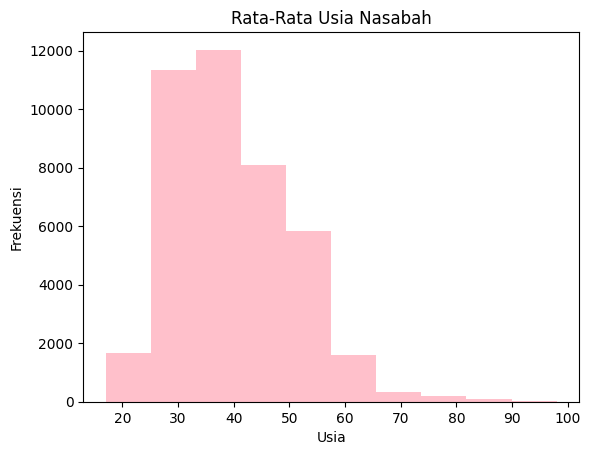

In [11]:
plt.hist(df.age, bins=10, histtype='bar', color='pink')
plt.title('Rata-Rata Usia Nasabah')
plt.xlabel('Usia')
plt.ylabel('Frekuensi')

**Kesimpulan :**

Dari analisis diatas dapat diketahui bahwa rata-rata nasabah bank dalam dataset berusia antara 30-50 tahun

## 2. Pekerjaan Nasabah Bank

In [12]:
df['job'].value_counts()

job
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: count, dtype: int64

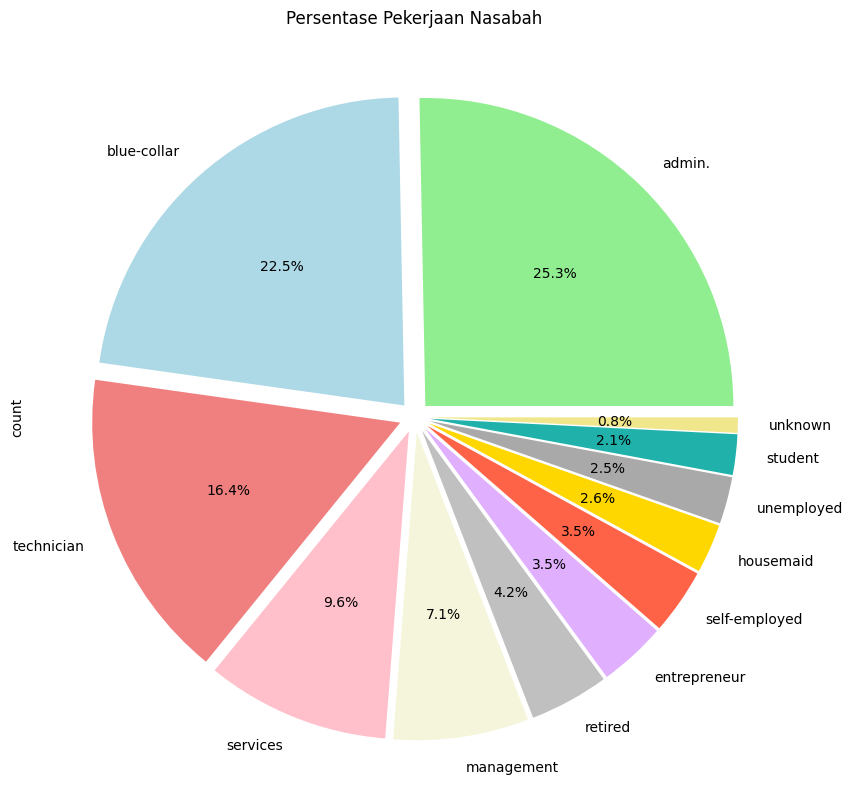

In [13]:
plt.figure(figsize=(20, 10))
ax = plt.axes()
plt.title('Persentase Pekerjaan Nasabah')
df['job'].value_counts().plot.pie(autopct='%1.1f%%', 
                                  explode=[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 
                                  colors=['lightgreen', 'lightblue', 'lightcoral', 'pink', 'beige', '#C0C0C0', '#E0B0FF', 'tomato', 'gold', 'darkgrey','lightseagreen','khaki'])
plt.show()

**Kesimpulan :**
<br> Berdasarkan analisis diatas dapat diketahui bahwa sebaanyak 25.3% atau 10419 nasabah bank bekerja sebagai Admin, 22,5% atau sebanyak 9253 bekerja sebagai Blue Collar, dan 16,4% atau sebanyak 6739 nasabah bekerja sebagai Technician.

## 3. Banyak Nasabah Bank yang Memiliki Kredit dan Pinjaman

In [14]:
df_default = df['default'].value_counts().to_frame(name='Memiliki Kredit')
df_loan = df['loan'].value_counts().to_frame(name='Memiliki Pinjaman')

# Combine into a single DataFrame with 'default' and 'loan' as index
df_DL = pd.concat([df_default, df_loan], axis=1)
df_DL


,Memiliki Kredit,Memiliki Pinjaman
no,32577,33938
unknown,8596,990
yes,3,6248


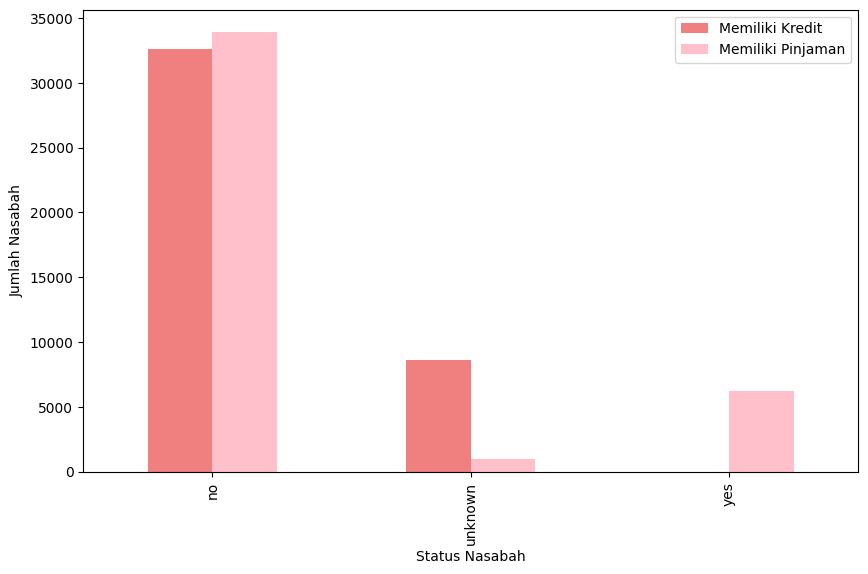

In [15]:
fig, ax = plt.subplots(figsize=(10, 6))

# Set colors directly in the DataFrame plot method
df_DL.plot(kind='bar', ax=ax, color=['lightcoral', 'pink'])

# Customize labels and legend
plt.xlabel('Status Nasabah')
plt.ylabel('Jumlah Nasabah')
plt.ylim(ymin=0)
plt.legend()

plt.show()


__Kesimpulan :__
1. Banyak nasabah yang tidak memiliki pinjaman ataupun memiliki Kredit, yaitu yang tidak memiliki pinjaman sebanyak 33938 orang, dan yang tidak memiliki kredit sebanyak 32577 orang.
2. Terdapat 8596 orang nasabah tidak diketahui apakah memiliki kredit dan sebanyak 990 org nasabah tidak diketahui apakah memiliki pinjaman
3. Nasabah yang memiliki kredit hanya 3 org saja dan yang memiliki pinjaman terdapat 6248 orang nasabah.

## 4. Banyak Nasabah yang Berlangganan dan Tidak Berlangganan Deposit

In [16]:
df["y"].value_counts()

y
no     36537
yes     4639
Name: count, dtype: int64

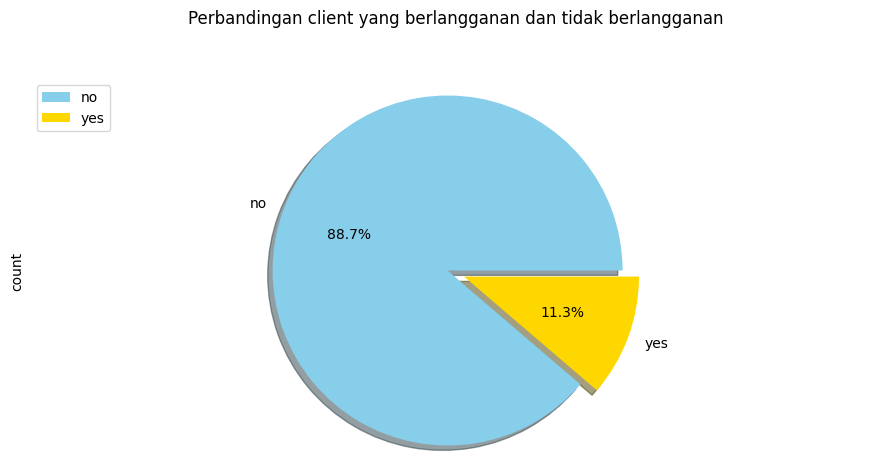

In [17]:
plt.figure(figsize=(11, 5))
df["y"].value_counts().plot.pie(colors=['skyblue','gold'], 
                                                shadow=True, 
                                                autopct='%1.1f%%',
                                                explode=[0.05, 0.05])

plt.title('Perbandingan client yang berlangganan dan tidak berlangganan', y=1.12)
plt.legend(loc='upper left')
plt.axis('equal')

plt.show()

**Kesimpulan :**

Perbandingan nasabah yang berlangganan dan tidak berlangganan deposit :
- Nasabah yang berlangganan terdapat 11.3% atau 4639
- Nasabah tidak berlangganan terdapat 88.7% atau 36537

## 5. Status Marital Nasabah yang Banyak Berlangganan Deposit

- Melihat jumlah nasabah berdasakan statusnya

In [18]:
df["marital"].value_counts()

marital
married     24921
single      11564
divorced     4611
unknown        80
Name: count, dtype: int64

In [19]:
df['Client_Subscribed'] = (df['y'] == 'yes').astype(int)

- Melihat banyak nasabah yang Berlangganan Deposit berdasarkan status maritalnya

In [20]:
MarCliSub = df[(df['marital'].isin(['married', 'single','divorced','unknown'])) & 
       (df['Client_Subscribed'] == 1)].groupby('marital')['Client_Subscribed'].sum().to_frame()
MarCliSub = MarCliSub.reset_index()
MarCliSub.index.name= None
MarCliSub


,marital,Client_Subscribed
0,divorced,476
1,married,2531
2,single,1620
3,unknown,12


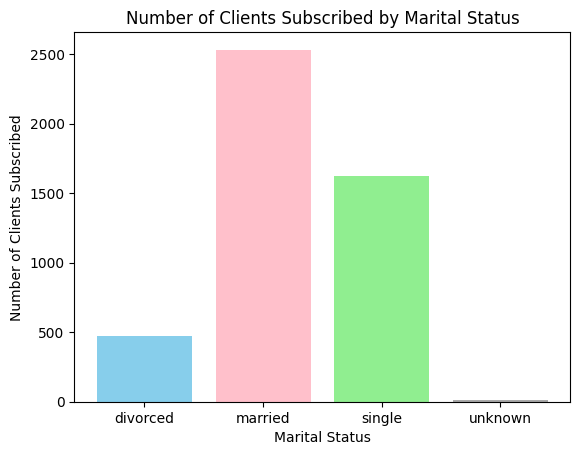

In [21]:
plt.bar(MarCliSub['marital'], MarCliSub['Client_Subscribed'], color = ('skyblue','pink','lightgreen','darkgrey'))

# Adding labels and title
plt.xlabel('Marital Status')
plt.ylabel('Number of Clients Subscribed')
plt.title('Number of Clients Subscribed by Marital Status')

# Display the plot
plt.show()

**Kesimpulan :**
- Nasabah yang berlangganan deposit __paling banyak__ berstatus yang telah __married__ yaitu 2.531 orang
- Jumlah masing-masing marital status dari client yang berlangganan deposit
    
|Jumah Divorced|Jumlah Married|Jumlah Single|Unknow|
|:-------|:------|:-------|:------|
|476|2531|1620|12|


# **E. DATA PREPROCESSING**
-----

In [22]:
#Menghapus kolom "y" karena sudah diganti oleh kolom "Client_Subscribed" dan kolom yang tidak diperlukan untuk model
df.drop(columns=['y', 'duration', 'day_of_week'], inplace=True)
df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Client_Subscribed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


## 1. Label Encoder

In [23]:
labelEncod = preprocessing.LabelEncoder()

In [24]:
# Mengambil tipe data object pada dataset dan di simpan didata
df_category = df.select_dtypes(include='object')
new_df = df.copy()

In [25]:
for column in df_category.columns:
    new_df[column] = labelEncod.fit_transform(df[column])

new_df.head(5)

,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Client_Subscribed
0,56,3,1,0,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [26]:
new_df['Client_Subscribed'].value_counts()

Client_Subscribed
0    36537
1     4639
Name: count, dtype: int64

In [27]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41176 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41176 non-null  int64  
 1   job                41176 non-null  int32  
 2   marital            41176 non-null  int32  
 3   education          41176 non-null  int32  
 4   default            41176 non-null  int32  
 5   housing            41176 non-null  int32  
 6   loan               41176 non-null  int32  
 7   contact            41176 non-null  int32  
 8   month              41176 non-null  int32  
 9   campaign           41176 non-null  int64  
 10  pdays              41176 non-null  int64  
 11  previous           41176 non-null  int64  
 12  poutcome           41176 non-null  int32  
 13  emp.var.rate       41176 non-null  float64
 14  cons.price.idx     41176 non-null  float64
 15  cons.conf.idx      41176 non-null  float64
 16  euribor3m          41176 no

## 2. Undersampling 
Untuk mengatasi ketidakseimbangan kelas, yang terjadi ketika satu kelas dalam suatu masalah klasifikasi memiliki jumlah instansi yang jauh lebih sedikit daripada kelas lainnya. Alasan menggunakan undersampling karena terdapat perbedaan jumlah yang jauh antara 'yes' dan 'no' pada atribut `Client_Subscribed`. 

Pada kasus ini, saya akan membuat dataset menjadi 4639, yaitu nilai minoritas.

In [28]:
from sklearn.utils import resample

# Create two different dataframes of majority and minority class
df_majority = new_df[new_df['Client_Subscribed'] == 0]
df_minority = new_df[new_df['Client_Subscribed'] == 1]

# Undersample majority class
df_majority_undersampled = resample(df_majority, replace=False, n_samples=len(df_minority), random_state=42)

# Combine majority class with minority class
df_fix = pd.concat([df_majority_undersampled, df_minority])

df_fix.head(3)


,age,job,marital,education,default,housing,loan,contact,month,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Client_Subscribed
13266,25,1,2,2,1,2,0,0,3,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0
24383,52,4,1,6,0,2,2,0,7,1,999,0,1,-0.1,93.200,-42.0,4.191,5195.8,0
17154,60,5,1,1,1,0,0,0,3,1,999,0,1,1.4,93.918,-42.7,4.962,5228.1,0


In [29]:
df_fix['Client_Subscribed'].value_counts()

Client_Subscribed
0    4639
1    4639
Name: count, dtype: int64

## 3. Feature Scalling

In [30]:
#Membuat objek StandardScaler utuk melakukan scaling pada setiap kolom numerik
scaler = preprocessing.StandardScaler()

#Copy data frame df_fix dan simpan pada data_scaler
data_scaler = df_fix.copy()

#Setiap kolom diubah nilainya dengan method fit_trasnform() dan hasilnya disimpan pada numeric_df
numeric_df = df_fix.select_dtypes(include=['int64','float64','int32'])
for column in numeric_df.columns:
  data_scaler[column] = scaler.fit_transform(df_fix[column].values.reshape(-1,1))

## 4. Correlation Matrix

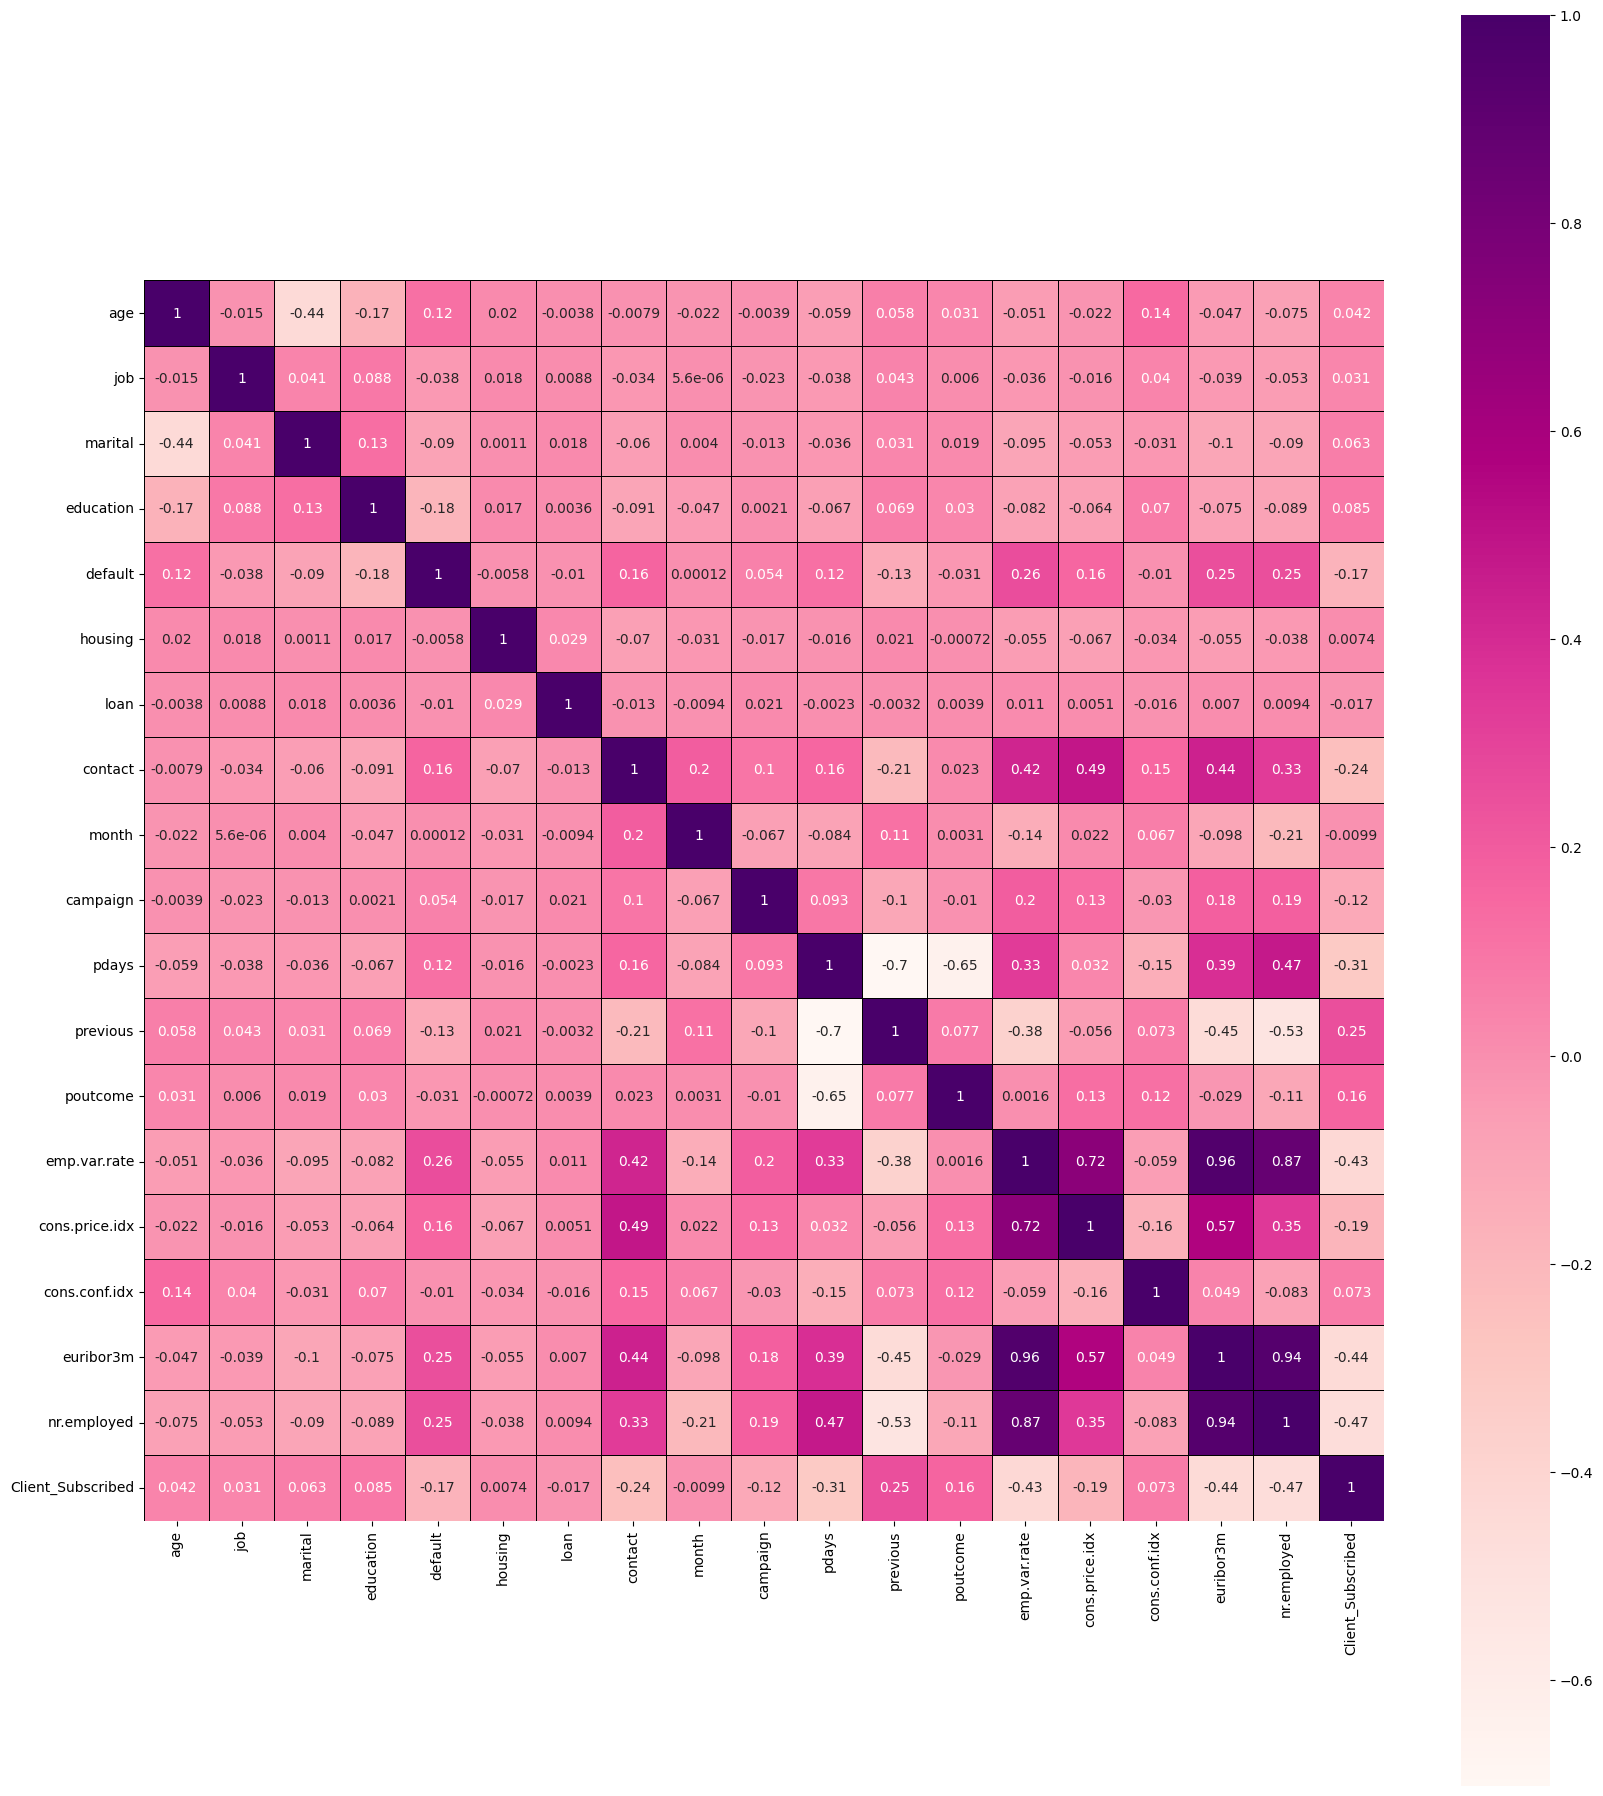

In [31]:
plt.figure(figsize=(20,23)) 
    
# Membuat heatmap dengan menampilkan nilai dari korelasi
sns.heatmap(data_scaler.corr(), 
            annot=True, 
            cmap="RdPu", 
            linewidths=.5, 
            linecolor='black', 
            square=True); 

In [32]:
data_scaler.corr()[['Client_Subscribed']].sort_values(by='Client_Subscribed', ascending=False)

,Client_Subscribed
Client_Subscribed,1.000000
previous,0.252578
poutcome,0.163977
education,0.085284
cons.conf.idx,0.073200
marital,0.062642
age,0.041855
job,0.030640
housing,0.007448
month,-0.009919


**Kesimpulan:** <br>
Berdasarkan visualisasi heatmap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan kolom `Client_Subscribed` adalah sebagai berikut:
1. `previous`, dengan korelasi sebesar 0.252578
2. `poutcome`, dengan korelasi sebesar 0.163977
3. `education`, dengan korelasi sebesar 0.085284
4. `emp.var.rate`, dengan korelasi sebesar -0.427479
5. `euribor3m`, dengan korelasi sebesar -0.444452
6. `nr.employed`, dengan korelasi sebesar -0.465345

In [33]:
#menghapus atribut yang tidak terlalu diperlukan
df_fix.drop(columns=['housing','month','loan'], inplace = True)

# __F. MODELLING__
-----

Model yang kita buat akan ada 6, diantaranya:
1. Logistic Regression
2. K-Nearest Neighbour
3. Support Vector Machine
4. Naive Bayes
5. Decision Tree
6. Random Forest

In [34]:
# memisahkan variabel dependen dan independen pada data training dan testing
x = df_fix.drop(['Client_Subscribed'],axis=1)
y = df_fix['Client_Subscribed']

In [35]:
# Trainning model
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

print('x_train shape :', x_train.shape)
print('x_test shape :', x_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

x_train shape : (6494, 15)
x_test shape : (2784, 15)
y_train shape : (6494,)
y_test shape : (2784,)


In [36]:
#Melihat pembagian data pada training set dan test set
print("{0:0.2f}% ada pada training set". format((len(x_train)/len(df_fix.index)) * 100))
print("{0:0.2f}% ada pada test set". format((len(x_test)/len(df_fix.index)) * 100))

69.99% ada pada training set
30.01% ada pada test set


## 1. Logistic Regression

In [37]:
#Model defining
LogReg_model = LogisticRegression(random_state=42)

In [38]:
#Model Training
LogReg_model.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [39]:
LogReg_pred = LogReg_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(LogReg_model.score(x_train, y_train)))

#Mengevaluasi model test
LogReg_model.score(x_test, y_test)
print("Test score:{:.4f}".format(LogReg_model.score(x_test, y_test)))

Train score: 0.7139
Test score:0.7213


### - Confusion Matrix

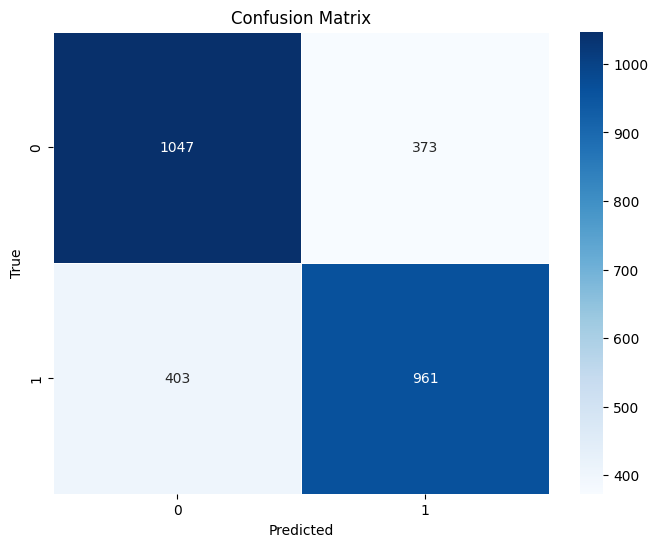

Akurasi Model : 
 0.7212643678160919
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1420
           1       0.72      0.70      0.71      1364

    accuracy                           0.72      2784
   macro avg       0.72      0.72      0.72      2784
weighted avg       0.72      0.72      0.72      2784



In [40]:
cm_logreg = confusion_matrix(y_test, LogReg_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", LogReg_model.score(x_test, y_test))
print(classification_report(y_test, LogReg_pred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 69%. Diperoleh juga hasil akurasi sebesar 72%.


Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Logistic Regression menunjukkan bahwa terdapat 1047 + 961 prediksi yang benar dan 373 + 403 prediksi yang salah. atau
1. 1047 prediksi negatif yang benar = 1047 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 403 prediksi negatif yang salah = 403 pengamatan yang salah sebagai nol atau no
3. 373 prediksi positif yang salah = 373 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 961 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes



## 2. K-Nearest Neighbour

In [41]:
#Model Defining
KNN_model = KNeighborsClassifier()

In [42]:
#Model Training
KNN_model.fit(x_train, y_train)

KNeighborsClassifier()

In [43]:
KNN_ypred = KNN_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(KNN_model.score(x_train, y_train)))

#Mengevaluasi model test
KNN_model.score(x_test, y_test)
print("Test score:{:.4f}".format(KNN_model.score(x_test, y_test)))


Train score: 0.7913
Test score:0.6954


### - Confusion Matrix

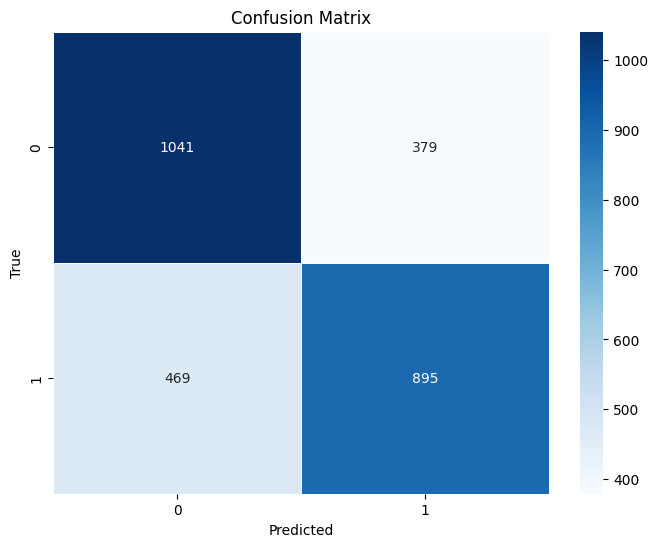

Akurasi Model : 
 0.6954022988505747
              precision    recall  f1-score   support

           0       0.69      0.73      0.71      1420
           1       0.70      0.66      0.68      1364

    accuracy                           0.70      2784
   macro avg       0.70      0.69      0.69      2784
weighted avg       0.70      0.70      0.69      2784



In [44]:
cm_KNN = confusion_matrix(y_test, KNN_ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_KNN, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", KNN_model.score(x_test, y_test))
print(classification_report(y_test, KNN_ypred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 65%. Diperoleh juga hasil akurasi sebesar 70%.

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model K-Nearest Neighbour menunjukkan bahwa terdapat 1041 + 895 prediksi yang benar dan 469 + 379 prediksi yang salah. atau
1. 1041 prediksi negatif yang benar = 1041 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 469 prediksi negatif yang salah = 469 pengamatan yang salah sebagai nol atau no
3. 379 prediksi positif yang salah = 379 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 895 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes


## 3. Support Vector Machine(SVM)

In [45]:
#Model Defining
svm_model = svm.SVC(random_state=42, probability=True)

In [46]:
# Model Training
svm_model.fit(x_train, y_train)

SVC(probability=True, random_state=42)

In [47]:
svm_ypred = svm_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(svm_model.score(x_train, y_train)))

#Mengevaluasi model test
svm_model.score(x_test, y_test)
print("Test score:{:.4f}".format(svm_model.score(x_test, y_test)))

Train score: 0.7133
Test score:0.7202


### - Confusion Matrix

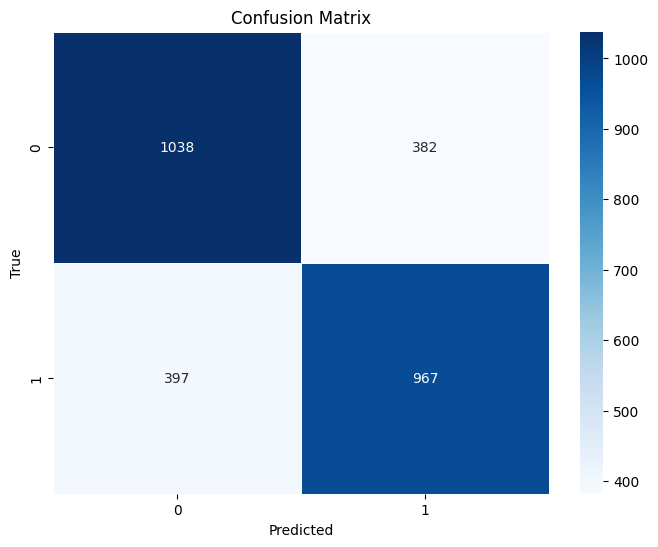

Akurasi Model : 
 0.7201867816091954
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1420
           1       0.72      0.71      0.71      1364

    accuracy                           0.72      2784
   macro avg       0.72      0.72      0.72      2784
weighted avg       0.72      0.72      0.72      2784



In [48]:
cm_svm = confusion_matrix(y_test, svm_ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", svm_model.score(x_test, y_test))
print(classification_report(y_test, svm_ypred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 70%. Diperoleh juga hasil akurasi sebesar 72%.

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Support Vector Machine(SVM) menunjukkan bahwa terdapat 1038 + 967 prediksi yang benar dan 397 + 382 prediksi yang salah. atau
1. 1038 prediksi negatif yang benar = 1038 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 397 prediksi negatif yang salah = 397 pengamatan yang salah sebagai nol atau no
3. 382 prediksi positif yang salah = 382 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 967 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## 4. Naive Bayes

In [49]:
#Model Defining
NB_model = GaussianNB()

In [50]:
#Model Training 
NB_model.fit(x_train, y_train)

GaussianNB()

In [51]:
NB_ypred = NB_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(NB_model.score(x_train, y_train)))

#Mengevaluasi model test
NB_model.score(x_test, y_test)
print("Test score:{:.4f}".format(NB_model.score(x_test, y_test)))

Train score: 0.7193
Test score:0.7313


### - Confusion Matrix

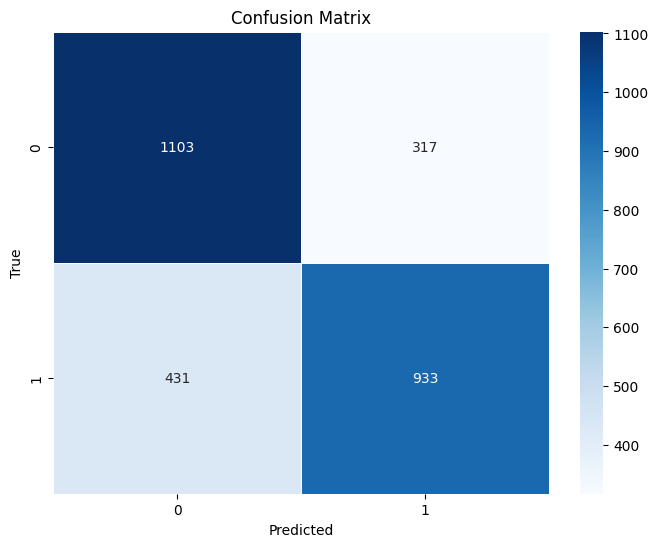

Akurasi Model : 
 0.7313218390804598
              precision    recall  f1-score   support

           0       0.72      0.78      0.75      1420
           1       0.75      0.68      0.71      1364

    accuracy                           0.73      2784
   macro avg       0.73      0.73      0.73      2784
weighted avg       0.73      0.73      0.73      2784



In [52]:
cm_nb = confusion_matrix(y_test, NB_ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", NB_model.score(x_test, y_test))
print(classification_report(y_test, NB_ypred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 67%. Diperoleh juga hasil akurasi sebesar 73%.

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Naive Bayes menunjukkan bahwa terdapat 1103+ 933 prediksi yang benar dan 431 + 317 prediksi yang salah. atau
1. 1103 prediksi negatif yang benar = 1103 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 431 prediksi negatif yang salah = 431 pengamatan yang salah sebagai nol atau no
3. 317 prediksi positif yang salah = 317 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 933 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## 5. Decision Tree


In [53]:
#Model Defining
from sklearn.tree import DecisionTreeClassifier
DC_model = DecisionTreeClassifier()

In [54]:
#Model Training
DC_model.fit(x_train, y_train)

DecisionTreeClassifier()

In [55]:
DC_ypred = DC_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(DC_model.score(x_train, y_train)))

#Mengevaluasi model test
DC_model.score(x_test, y_test)
print("Test score:{:.4f}".format(DC_model.score(x_test, y_test)))

Train score: 0.9923
Test score:0.6408


### - Confusion Matrix

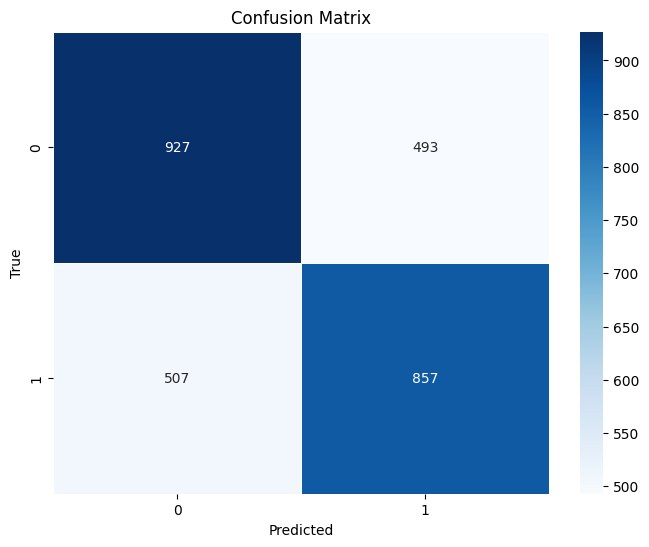

Akurasi Model : 
 0.6408045977011494
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1420
           1       0.63      0.63      0.63      1364

    accuracy                           0.64      2784
   macro avg       0.64      0.64      0.64      2784
weighted avg       0.64      0.64      0.64      2784



In [56]:
cm_dc = confusion_matrix(y_test, DC_ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_dc, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", DC_model.score(x_test, y_test))
print(classification_report(y_test, DC_ypred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 62%. Diperoleh juga hasil akurasi sebesar 64%.

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model Decision Tree menunjukkan bahwa terdapat 927 + 866 prediksi yang benar dan 498 + 493 prediksi yang salah. atau
1. 927 prediksi negatif yang benar = 927 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 498 prediksi negatif yang salah = 498 pengamatan yang salah sebagai nol atau no
3. 493 prediksi positif yang salah = 493 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 866 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

### - Visualisasi Decision Tree

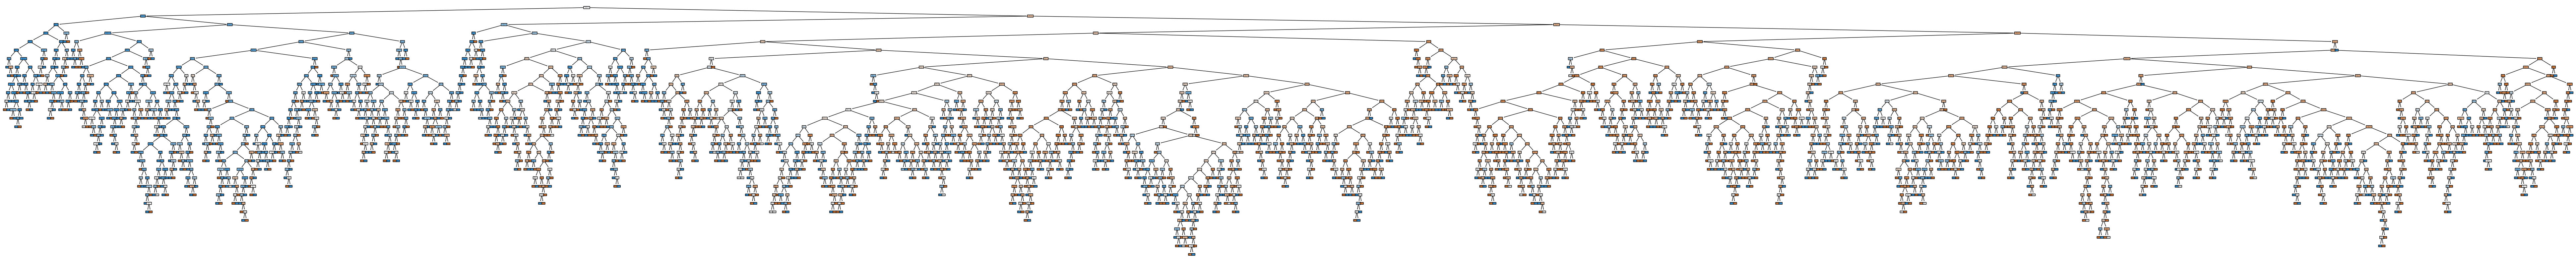

In [57]:
plt.figure(figsize=(100, 10))
plot_tree(DC_model, feature_names=df_fix.columns[:-1], class_names=['0', '1'], filled=True, rounded=True)
plt.show()


## 6. Random Forest

In [58]:
#Model Defining
RF_model = RandomForestClassifier(random_state=42)

In [59]:
#Model Training
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [60]:
RF_ypred = RF_model.predict(x_test)

#Mengevaluasi model data train
print("Train score: {:.4f}".format(RF_model.score(x_train, y_train)))

#Mengevaluasi model test
RF_model.score(x_test, y_test)
print("Test score:{:.4f}".format(RF_model.score(x_test, y_test)))


Train score: 0.9923
Test score:0.7324


### - Confusion Matrix

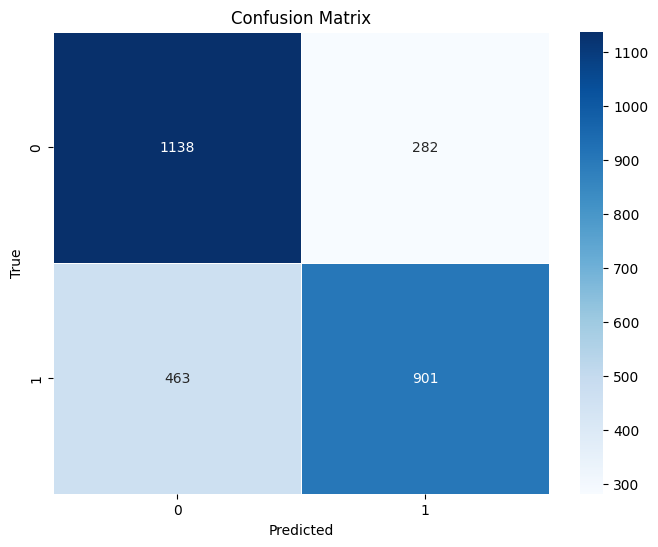

Akurasi Model : 
 0.7323994252873564
              precision    recall  f1-score   support

           0       0.71      0.80      0.75      1420
           1       0.76      0.66      0.71      1364

    accuracy                           0.73      2784
   macro avg       0.74      0.73      0.73      2784
weighted avg       0.74      0.73      0.73      2784



In [61]:
cm_rf = confusion_matrix(y_test, RF_ypred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Blues", linewidths=.5)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("Akurasi Model : \n", RF_model.score(x_test, y_test))
print(classification_report(y_test, RF_ypred))

**Kesimpulan**
<BR>Hasil precision, recall dan f1-score pada Y (0 dan 1) menunjukan nilai > 65%. Diperoleh juga hasil akurasi sebesar 73%.

Berdasarkan output di atas,dapat terlihat pada confusion matrix untuk model  Random Forest menunjukkan bahwa terdapat 1138 + 901 prediksi yang benar dan 463 + 282 prediksi yang salah. atau
1. 1138 prediksi negatif yang benar = 1138 pengamatan pertama adalah nol atau no yang diprediksi dengan benar
2. 463 prediksi negatif yang salah = 463 pengamatan yang salah sebagai nol atau no
3. 282 prediksi positif yang salah = 282 pengamatan keempat adalah prediksi yang salah dinyatakan sebagai 1 atau yes
4. 901 prediksi positif yang benar = pengamatan terakhir adalah yang diprediksi dengan benar dinyatakan sebagai 1 atau yes

## __RINGKASAN AKURASI MODELING__

In [62]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Assuming you have x_train, y_train, x_test, y_test defined
all_model = [LogisticRegression,
             KNeighborsClassifier,
             svm.SVC,
             GaussianNB,
             DecisionTreeClassifier,
             RandomForestClassifier]

model_name = ['LogisticRegression',
              'KNeighborsClassifier',
              'SVM',
              'NaiveBayes',
              'DecisionTreeClassifier',
              'RandomForestClassifier',]
 
hasil_train = []
hasil_test = []

for model_type in all_model:
    if model_type in [LogisticRegression, svm.SVC, DecisionTreeClassifier, RandomForestClassifier]:
        model = model_type(random_state=42)
    elif model_type == KNeighborsClassifier:
        model = model_type()  # You can specify other parameters as well
    elif model_type == svm.SVC:
        model = model_type(random_state=42, probability=True)
    else:
        model = model_type()
        
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)
    hasil_train.append(model.score(x_train, y_train))
    hasil_test.append(model.score(x_test, y_test))


In [63]:
data_hasil = pd.DataFrame()
data_hasil['model'] = model_name
data_hasil['Accuracy training'] = hasil_train
data_hasil['Accuracy test (Model)'] = hasil_test



data_hasil.sort_values(by='Accuracy test (Model)',ascending = False)

,model,Accuracy training,Accuracy test (Model)
5,RandomForestClassifier,0.992301,0.732399
3,NaiveBayes,0.719279,0.731322
0,LogisticRegression,0.713890,0.721264
2,SVM,0.713274,0.720187
1,KNeighborsClassifier,0.791346,0.695402
4,DecisionTreeClassifier,0.992301,0.647629


#### __Kesimpulan__
Dari ke-6 model yang telah dibuat, diperoleh hasil bahwa model Random Forest memiliki **akurasi paling tinggi yaitu 73.2%**. Sehingga, model **Random Forest yang paling cocok** dengan dataset tersebut karena memiliki akurasi lebih tinggi dibanding model machine learning lainnya.

# **G. KESIMPULAN** 
---------

- Data yang digunakan dalam analisis dan membuat model adalah 'bank-additional-full.csv'
- Insight Data

    1. **Rata-rata usia nasabah bank** berada dalam rentang usia **30-50 tahun**
    2. **Nasabah** bank paling **banyak bekerja** sebagai **Admin yaitu 25.3% atau 10419 orang**, lalu 22,5% atau sebanyak 9253 bekerja sebagai Blue Collar, dan 16,4% atau sebanyak 6739 nasabah bekerja sebagai Technician.
    3. Banyak nasabah yang tidak memiliki pinjaman ataupun memiliki Kredit, yaitu yang **tidak memiliki pinjaman** sebanyak **33938** orang, dan yang **tidak memiliki kredit** sebanyak **32577** orang. 
    4. Nasabah yang **memiliki kredit** hanya **3 org** saja dan yang **memiliki pinjaman** terdapat **6248 orang** nasabah.
    5. Nasabah yang **berlangganan deposit** terdapat **11.3% atau 4639** dan yang tidak berlangganan terdapat 88.7% atau 36537
    6. Nasabah yang berlangganan deposit __paling banyak__ berstatus telah __married__ yaitu 2.531 orang
- Model Random Forest memiliki akurasi paling tinggi yaitu 73.2%. Sehingga model Random Forest sangat cocok digunakan pada dataset ini.